<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [179]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [180]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-10-29 13:56:25--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.07s   

2020-10-29 13:56:26 (304 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [181]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [182]:
df.shape
df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


### Convert to date time object 

In [183]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [184]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [ ]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

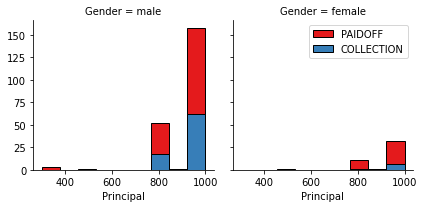

In [185]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

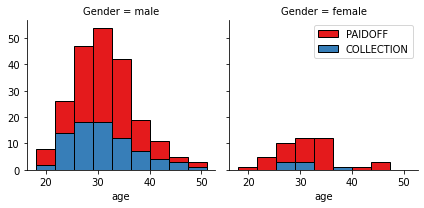

In [186]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

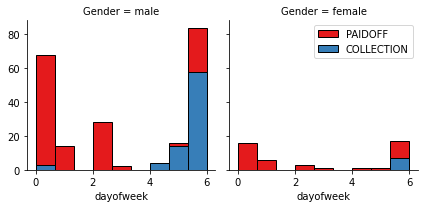

In [187]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [188]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [189]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [190]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding  
#### How about education?

In [191]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [192]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [193]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [194]:
X = Feature
X[0:5]


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

### change the loan_status to catgory : paidof = 0 and colleciton=1

In [195]:
#df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)

In [197]:
y = df['loan_status'].values
y[0:5]


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [198]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


### Find the best K value from training dataset  for KNN
The function below find k accuracy score of the kth cluster from by using the accuracy_score between y_test and yhat

In [201]:
clusters = 10
mean_accuracy = np.zeros((clusters-1))
standared_accuracy = np.zeros ((clusters-1))
confusion_metric = []
for n in range(1,clusters):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_accuracy[n-1] = metrics.accuracy_score(y_test, yhat)
    standared_accuracy[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])# compares two array values and return boolean standared deviation array

mean_accuracy

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286])

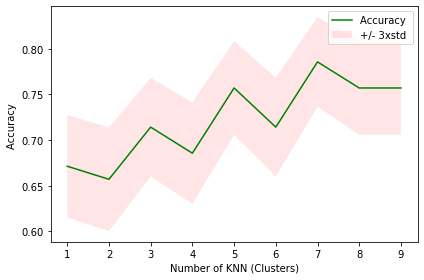

The best accuracy was with 0.7857142857142857 with k= 7


In [202]:
plt.plot(range(1,clusters),mean_accuracy,'g')
plt.fill_between(
    range(1,clusters),
    mean_accuracy - 1 * standared_accuracy,
    mean_accuracy + 1 * standared_accuracy,
    alpha=0.10,
    facecolor='red')


plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of KNN (Clusters)')
plt.tight_layout()

plt.show()


print( "The best accuracy was with", mean_accuracy.max(), "with k=", mean_accuracy.argmax()+1) 


In [204]:
clusters = 7
knn6 = KNeighborsClassifier (n_neighbors = clusters).fit(X_train, y_train)
y_hat6 = knn6.predict(X_test)

print("Taining accuracy for KNN:",metrics.accuracy_score(y_train,knn6.predict(X_train)))
print("Test set Accuracy for KNN: ", metrics.accuracy_score(y_test, y_hat6))

Taining accuracy for KNN: 0.8079710144927537
Test set Accuracy for KNN:  0.7857142857142857


# Decision Tree

In [205]:
from sklearn.tree import DecisionTreeClassifier

In [206]:
loan_tree = DecisionTreeClassifier(criterion = "entropy", max_depth=4 )
loan_tree.fit(X_train, y_train)

loan_pred = loan_tree.predict(X_test)

print("Taining accuracy for DecisionTree:",metrics.accuracy_score(y_train,loan_tree.predict(X_train)))
print("Test set Accuracy for DecisionTree: ", metrics.accuracy_score(y_test, loan_pred))

print(loan_pred[0:10])
print(y_test[0:10])

Taining accuracy for DecisionTree: 0.7463768115942029
Test set Accuracy for DecisionTree:  0.6142857142857143
['COLLECTION' 'COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


# Support Vector Machine

In [207]:
from sklearn import svm

In [208]:
#SVM algo with kernel function : linear
svm_linear = svm.SVC(kernel = 'linear')
svm_linear.fit(X_train, y_train)

svm_linear_hat = svm_linear.predict(X_test)

print("Taining accuracy for SVM_linear:",metrics.accuracy_score(y_train,svm_linear.predict(X_train)))
print("Test set Accuracy for SVM_linear: ", metrics.accuracy_score(y_test, svm_linear_hat))

print(y_test[0:10])
print(svm_linear_hat[0:10])


Taining accuracy for SVM_linear: 0.7427536231884058
Test set Accuracy for SVM_linear:  0.7857142857142857
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [209]:
#SVM algo with kernel function : polynomial
svm_poly = svm.SVC(kernel = 'poly')
svm_poly.fit(X_train, y_train)

svm_poly_hat = svm_poly.predict(X_test)

print("Taining accuracy for svm_poly:",metrics.accuracy_score(y_train,svm_poly.predict(X_train)))
print("Test set Accuracy for svm_poly: ", metrics.accuracy_score(y_test, svm_poly_hat))

print(y_test[0:10])
print(svm_poly_hat[0:10])

Taining accuracy for svm_poly: 0.782608695652174
Test set Accuracy for svm_poly:  0.7714285714285715
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'COLLECTION' 'PAIDOFF' 'PAIDOFF']


In [210]:
#SVM algo with kernel function : Radial basis function
svm_rbf = svm.SVC(kernel = 'rbf')
svm_rbf.fit(X_train, y_train)

svm_rbf_hat = svm_rbf.predict(X_test)

print("Taining accuracy for svm_rbf:",metrics.accuracy_score(y_train,svm_rbf.predict(X_train)))
print("Test set Accuracy for svm_rbf: ", metrics.accuracy_score(y_test, svm_rbf_hat))

print(y_test[0:10])
print(svm_rbf_hat[0:10])

Taining accuracy for svm_rbf: 0.782608695652174
Test set Accuracy for svm_rbf:  0.7428571428571429
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'COLLECTION' 'COLLECTION' 'PAIDOFF' 'PAIDOFF']


In [211]:
#SVM algo with kernel function : sigmoid
svm_sigmoid = svm.SVC(kernel = 'sigmoid')
svm_sigmoid.fit(X_train, y_train)

svm_sigmoid_hat = svm_sigmoid.predict(X_test)

print("Taining accuracy for svm_sigmoid:",metrics.accuracy_score(y_train,svm_sigmoid.predict(X_train)))
print("Test set Accuracy for svm_sigmoid: ", metrics.accuracy_score(y_test, svm_sigmoid_hat))

print(y_test[0:10])
print(svm_sigmoid_hat[0:10])

Taining accuracy for svm_sigmoid: 0.7101449275362319
Test set Accuracy for svm_sigmoid:  0.7428571428571429
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


# Logistic Regression

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [213]:
logistic_regression = LogisticRegression(C = 0.01, solver = 'liblinear')
logistic_regression.fit(X_train, y_train)

logistic_regression_hat = logistic_regression.predict(X_test)

print("Taining accuracy for logistic_regression:",metrics.accuracy_score(y_train,logistic_regression.predict(X_train)))
print("Test set Accuracy for logistic_regression: ", metrics.accuracy_score(y_test, logistic_regression_hat))

print(y_test[0:10])
print(logistic_regression_hat[0:10])

Taining accuracy for logistic_regression: 0.7572463768115942
Test set Accuracy for logistic_regression:  0.6857142857142857
['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
['COLLECTION' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF'
 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


# Model Evaluation using Test set

In [267]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [268]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-10-29 16:07:51--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2020-10-29 16:07:51 (67.2 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for Evaluation 

In [269]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [270]:
test_df.shape

(54, 10)

In [271]:

# Pre-processing loan_test
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Feature_test = test_df[['Principal','terms','age','Gender','weekend']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)
X_testset = Feature_test
X_testset = preprocessing.StandardScaler().fit(X_testset).transform(X_testset)
X_testset[0:5]



array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -4.12310563,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054, -4.12310563,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211, -4.12310563,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.24253563,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.24253563,
         2.39791576, -0.79772404, -0.86135677]])

In [272]:

# Pre-processing loan_test y data
y_testset = test_df['loan_status'].values
y_testset[0:5]



array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

### Evaluation using test data set

### Evaluation of KNN with test dataset

In [273]:
# predicted y_hat on test dataset
y_hat_knn6 = knn6.predict(X_testset)

# jaccard
jaccard_knn6 = jaccard_score(y_testset, y_hat_knn6, pos_label='PAIDOFF' )
print("KNN with 6 clusters  Jaccard index value: ", round(jaccard_knn6,2))

# f1_score
f1_score_knn6 = f1_score(y_testset, y_hat_knn6, average='weighted')
print("KNN with 6 clusters F1-score: ", round(f1_score_knn6,2))


KNN with 6 clusters  Jaccard index value:  0.67
KNN with 6 clusters F1-score:  0.65


### Evaluation of of Decision tree

In [274]:
# predicted y value
y_hat_loan_tree = loan_tree.predict(X_testset)

# jaccard
jaccard_decisionTree = jaccard_score(y_testset, y_hat_loan_tree, pos_label='PAIDOFF' )
print("Decision Tree  Jaccard index: ", round (jaccard_decisionTree,2))

# f1_score
f1_score_decisionTree = f1_score(y_testset, y_hat_loan_tree, average='weighted')
print("Decisioin Tree F1-score: ", round (f1_score_decisionTree,2))



Decision Tree  Jaccard index:  0.4
Decisioin Tree F1-score:  0.54


### Evaluation of SVM

In [275]:
# predicted y
yhat_svm_rbf = svm_rbf.predict(X_testset)

# jaccard
jaccard_svm_rbf = jaccard_score(y_testset, yhat_svm_rbf, pos_label='PAIDOFF')
print("SVM _rbf  Jaccard index: ", round(jaccard_svm_rbf,2))

# f1_score
f1_score_svm_rbf = f1_score(y_testset, yhat_svm_rbf, average='weighted')
print("SVM F1-score: ", round(f1_score_svm_rbf,2))


SVM _rbf  Jaccard index:  0.8
SVM F1-score:  0.79


### Evaluation of Logistic Regression

In [276]:
# predicted y for LR
yhat_LR = logistic_regression.predict(X_testset)
yhat_LR_prob = logistic_regression.predict_proba(X_testset)

# jaccard
jaccard_LR = jaccard_score(y_testset, yhat_LR,pos_label='PAIDOFF')
print("Logistic Regression Jaccard index: ", round(jaccard_LR,2))

# f1_score
f1_score_LR = f1_score(y_testset, yhat_LR, average='weighted')
print("Logistic Regression F1-score: ", round(f1_score_LR),2)

# logloss
logloss_LR = log_loss(y_testset, yhat_LR_prob)
print("Logistic Regression log loss: ", round(logloss_LR),2)

Logistic Regression Jaccard index:  0.74
Logistic Regression F1-score:  1.0 2
Logistic Regression log loss:  1.0 2


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                |0.67     |0.65      | NA      |
| Decision Tree      |0.4      |0.54      | NA      |
| SVM                |0.8      |0.79      | NA      |
| LogisticRegression |0.74     |1.0 2     | 1.0 2   |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>